In [1]:
# Install required packages if they are not already installed
# Selenium is a browser automation tool
# undetected-chromedriver is used to bypass anti-bot detection
!pip install selenium  
!pip install undetected-chromedriver  
!pip install --upgrade webdriver-manager

In [5]:
urls = ['https://www.macys.com/shop/womens-clothing/new-womens-clothing/Product_department,Sortby/Jackets,BEST_SELLERS?id=68514']

In [7]:
# Import necessary libraries
import undetected_chromedriver as uc  # This module allows using Chrome in undetected mode to bypass bot protection
from selenium.webdriver.common.by import By  # Used for locating elements on the webpage
from selenium.webdriver.support.ui import WebDriverWait  # Used to introduce explicit waits in the script
from selenium.webdriver.support import expected_conditions as EC  # Conditions for WebDriverWait
from bs4 import BeautifulSoup as bs  # BeautifulSoup is used for parsing and scraping HTML content
import time  # Used for adding delays between actions
import random  # Used for generating random wait times for mimicking human-like behavior
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Set up Chrome options for undetected-chromedriver
options = uc.ChromeOptions()
options.add_argument('--no-sandbox')  # Disable sandbox for compatibility issues
options.add_argument('--disable-dev-shm-usage')  # Avoid shared memory issues, especially in cloud-based environments

# Initialize undetected Chrome WebDriver with the options specified
driver = uc.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Function to scroll down slowly
def slow_scroll(driver, scroll_height):
    current_height = 0
    increment = 600  # Scroll down 600 pixels at a time
    while current_height < scroll_height:
        # Execute JavaScript to scroll by 600 pixels from the current position
        driver.execute_script(f"window.scrollBy(0, {increment});")
        current_height += increment
        # Pause for a random amount of time (between 0.1 and 0.3 seconds) to mimic human behavior
        time.sleep(random.uniform(0.1, 0.3))

product_links = []  # List to store product links scraped from each page

# Loop through each URL in the 'urls' list
for url in urls:
    driver.get(url)  # Open the URL in the browser
    assert 'Macy' in driver.title  # Ensure the page has loaded by checking the title contains 'Macy'
    
    # Get the total height of the page using JavaScript
    total_height = driver.execute_script("return document.body.scrollHeight")

    # Call the slow_scroll function to scroll down slowly until the bottom of the page
    slow_scroll(driver, total_height)
    # Pause for a random duration (3-7 seconds) after scrolling to allow the page to load completely
    time.sleep(random.uniform(3, 7))

    # Get the HTML source of the page after scrolling
    html = driver.page_source

    # Parse the HTML using BeautifulSoup for scraping content
    soup = bs(html, 'html.parser')

    # Find all div elements with the class 'description-spacing' (these contain product links)
    for html_class in soup.find_all('div', class_="description-spacing"):
        sublink = html_class.find('a')  # Find the 'a' tag (which contains the link to the product)
        link = sublink.get('href')  # Extract the 'href' attribute (the actual product link)
        print(link)  # Print the link (for debugging purposes)
        product_links.append(link)  # Append the product link to the product_links list

# Close the browser once the scraping is done
driver.quit()


/shop/product/karl-lagerfeld-paris-womens-checkered-one-button-blazer?ID=18751335
/shop/product/donna-karan-womens-collarless-button-sleeve-blazer?ID=18799853&swatchColor=Peacock Bl
/shop/product/kasper-womens-single-button-notched-lapel-blazer?ID=18935114
/shop/product/style-co-womens-polar-fleece-mock-neck-jacket-created-for-macys?ID=18043259&swatchColor=Deep Black
/shop/product/levis-womens-ribbed-edge-cropped-denim-bomber-jacket?ID=17962311
/shop/product/on-34th-womens-plaid-boyfriend-blazer-created-for-macys?ID=18165791&swatchColor=Fuchsia Pur Cmb
/shop/product/style-co-womens-zip-front-polar-fleece-vest-created-for-macys?ID=18056887&swatchColor=Neo Natural
/shop/product/dkny-sport-womens-tech-fleece-logo-jacket?ID=18693336&swatchColor=Black
/shop/product/i.n.c.-international-concepts-womens-hourglass-trucker-jacket-created-for-macys?ID=18131002
/shop/product/tommy-hilfiger-womens-faux-leather-trim-riding-jacket?ID=18498960
/shop/product/avec-les-filles-womens-belted-long-sleeve-m

In [8]:
def extract_brand_name(string):
    parts = string.split('-')
    brand_name = " ".join(parts[:2])  # Taking first two elements assuming the brand name consists of two words
    return brand_name

In [9]:
brand_name=[]
prod_name=[]
for link in product_links:
    end = link.find('?')
    prod_start_name = link.find('w')
    print(extract_brand_name(link[14:])+'.........'+link[prod_start_name:end])
    brand_name.append(extract_brand_name(link[14:]))
    prod_name.append(link[prod_start_name:end])

karl lagerfeld.........womens-checkered-one-button-blazer
donna karan.........womens-collarless-button-sleeve-blazer
kasper womens.........womens-single-button-notched-lapel-blazer
style co.........womens-polar-fleece-mock-neck-jacket-created-for-macys
levis womens.........womens-ribbed-edge-cropped-denim-bomber-jacket
on 34th.........womens-plaid-boyfriend-blazer-created-for-macys
style co.........womens-zip-front-polar-fleece-vest-created-for-macys
dkny sport.........womens-tech-fleece-logo-jacket
i.n.c. international.........womens-hourglass-trucker-jacket-created-for-macys
tommy hilfiger.........womens-faux-leather-trim-riding-jacket
avec les.........womens-belted-long-sleeve-military-jacket
style co.........
karl lagerfeld.........womens-tweed-jacket-regular-petite
tommy hilfiger.........womens-faux-suede-trench-coat
tommy hilfiger.........womens-faux-suede-band-jacket
lauren ralph.........womens-twill-blazer
style co.........womens-embroidered-sleeve-field-jacket-created-for-macy

In [10]:
import pandas as pd
df = pd.DataFrame({'Brand Name':brand_name,'Product':prod_name})

In [11]:
df

,Brand Name,Product
0,karl lagerfeld,womens-checkered-one-button-blazer
1,donna karan,womens-collarless-button-sleeve-blazer
2,kasper womens,womens-single-button-notched-lapel-blazer
3,style co,womens-polar-fleece-mock-neck-jacket-created-f...
4,levis womens,womens-ribbed-edge-cropped-denim-bomber-jacket
5,on 34th,womens-plaid-boyfriend-blazer-created-for-macys
6,style co,womens-zip-front-polar-fleece-vest-created-for...
7,dkny sport,womens-tech-fleece-logo-jacket
8,i.n.c. international,womens-hourglass-trucker-jacket-created-for-macys
9,tommy hilfiger,womens-faux-leather-trim-riding-jacket


In [17]:
html.find('With offer')

486385

In [23]:
list_prods = soup.find_all('div',class_="product-thumbnail-container vertical-alignment")

In [25]:
len(list_prods)

60

In [59]:
reg_prices = []
offer_prices = []
for prod in list_prods:
    if(prod.find('span', class_="price-reg")):
        price = prod.find('span', class_="price-reg")
        price_text = price.get_text(strip=True)
        price_text = price_text[price_text.find('$'):price_text.find('-')]
        reg_prices.append(price_text)
    else:reg_prices.append('-')
    if(prod.find('span', class_='final-offer')):
        price = prod.find('span', class_='final-offer')
        price_text = price.get_text(strip=True)
        price_text = price_text[price_text.find('$'):]
        offer_prices.append(price_text)
    else:offer_prices.append('-')
    

In [61]:
reg_prices

['$199.0',
 '$169.0',
 '$119.0',
 '$49.5',
 '$150.0',
 '$99.5',
 '$39.5',
 '$59.5',
 '$79.6',
 '$169.0',
 '$159.0',
 '$49.5',
 '$179.0',
 '$229.0',
 '$149.0',
 '$425.0',
 '$71.6',
 '$139.0',
 '$179.0',
 '$139.0',
 '$99.5',
 '$79.5',
 '$95.6',
 '$150.0',
 '$149.0',
 '$89.00',
 '$189.0',
 '$95.6',
 '$149.0',
 '$69.00',
 '$159.0',
 '$139.0',
 '$71.6',
 '$195.0',
 '$139.0',
 '$39.5',
 '$159.0',
 '$150.0',
 '$120.0',
 '$99.00',
 '$189.0',
 '$89.5',
 '$161.1',
 '$139.0',
 '$129.9',
 '$119.5',
 '$195.0',
 '$159.0',
 '$169.0',
 '$169.0',
 '$82.1',
 '$179.0',
 '$31.6',
 '$79.6',
 '$39.6',
 '$87.6',
 '$245.0',
 '$139.0',
 '$119.0',
 '$120.0']

In [51]:
price = list_prods[0].find('span', class_='final-offer')
price_text = price.get_text(strip=True)
price_text = price_text[price_text.find('$'):]
price_text

'$139.30'

In [117]:
pricing = soup.find_all('span', class_="price-reg")
pricing

114

In [133]:
# Extract all the regular prices
reg_prices = [span.get_text(strip=True) for span in soup.find_all('span', class_='price-reg') if 'With offer' not in span.get_text()]

# Extract all the offer prices
offer_prices = [span.get_text(strip=True).replace('With offer', '').strip() for span in soup.find_all('span', class_='final-offer')]

In [63]:
df['Regular Price'] = reg_prices


In [65]:
df['Offer Price'] = offer_prices

In [67]:
len(df)

60

In [69]:
df

,Brand Name,Product,Regular Price,Offer Price
0,karl lagerfeld,womens-checkered-one-button-blazer,$199.0,$139.30
1,donna karan,womens-collarless-button-sleeve-blazer,$169.0,-
2,kasper womens,womens-single-button-notched-lapel-blazer,$119.0,$83.30
3,style co,womens-polar-fleece-mock-neck-jacket-created-f...,$49.5,$34.65
4,levis womens,womens-ribbed-edge-cropped-denim-bomber-jacket,$150.0,$105.00
5,on 34th,womens-plaid-boyfriend-blazer-created-for-macys,$99.5,$69.65
6,style co,womens-zip-front-polar-fleece-vest-created-for...,$39.5,$27.65
7,dkny sport,womens-tech-fleece-logo-jacket,$59.5,$41.65
8,i.n.c. international,womens-hourglass-trucker-jacket-created-for-macys,$79.6,$55.72
9,tommy hilfiger,womens-faux-leather-trim-riding-jacket,$169.0,$118.30


In [87]:
df.to_csv('macys.csv')

Text(0, 0.5, 'Frequency')

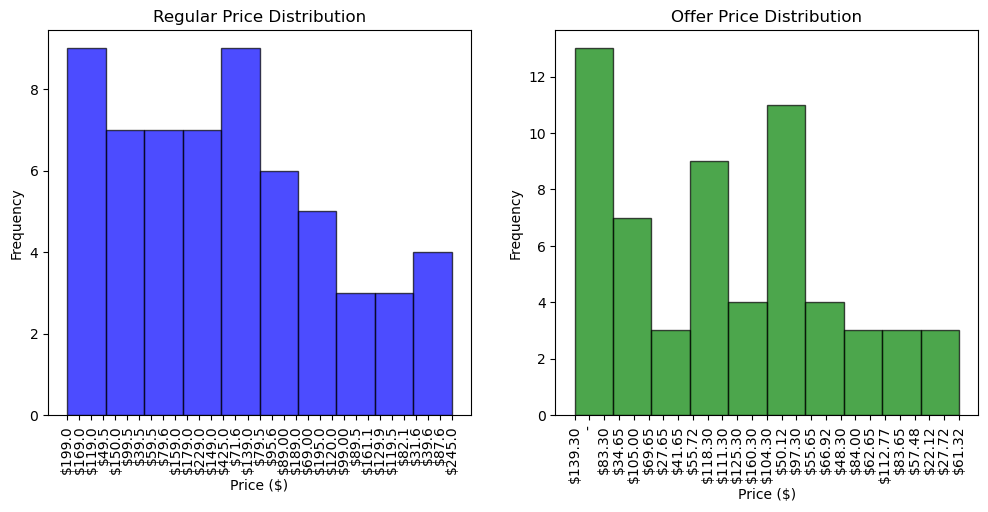

In [85]:
import matplotlib.pyplot as plt
# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for Regular Price
plt.subplot(1, 2, 1)
plt.hist(df['Regular Price'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Regular Price Distribution')
plt.xlabel('Price ($)')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

# Histogram for Offer Price
plt.subplot(1, 2, 2)
plt.hist(df['Offer Price'], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Offer Price Distribution')
plt.xticks(rotation=90)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')